In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
df = pd.read_csv("/Users/souravbarman/Documents/Machine Learning/deep learning project/Customer churn prediction using ANN/dataset/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print(df.shape)

(10000, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()


0

In [6]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first= True,dtype=int)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [15]:
X_train.shape

(8000, 11)

In [62]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,0,0,1
3850,680,34,3,143292.95,1,1,0,66526.01,0,0,1
4962,531,42,2,0.00,2,0,1,90537.47,0,0,0
3886,710,34,8,147833.30,2,0,1,1561.58,1,0,1
5437,543,30,6,73481.05,1,1,1,176692.65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,0,1,0
162,800,49,7,108007.36,1,0,0,47125.11,0,0,0
7903,567,34,10,0.00,2,0,1,161571.79,0,1,1
2242,621,30,2,101014.08,2,1,1,165257.31,1,0,0


In [44]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [65]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # output

In [66]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=200,verbose=1,validation_split=0.2)


Epoch 1/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.6598 - loss: 0.6218 - val_accuracy: 0.8012 - val_loss: 0.4768
Epoch 2/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.7864 - loss: 0.4694 - val_accuracy: 0.8056 - val_loss: 0.4452
Epoch 3/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.8077 - loss: 0.4381 - val_accuracy: 0.8094 - val_loss: 0.4308
Epoch 4/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.8199 - loss: 0.4186 - val_accuracy: 0.8156 - val_loss: 0.4204
Epoch 5/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.8248 - loss: 0.4085 - val_accuracy: 0.8156 - val_loss: 0.4111
Epoch 6/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.8238 - loss: 0.4120 - val_accuracy: 0.8231 - val_loss: 0.4019
Epoch 7/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.8306 - loss: 0.3941 - val_accuracy: 0.8269 - val_loss: 0.3927
Epoch 8/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.8352 - loss: 0

In [69]:
model.layers[2].get_weights()

[array([[ 1.6319076 ],
        [-0.6145087 ],
        [-0.8113929 ],
        [ 0.86496294],
        [ 0.6285246 ],
        [-0.7639875 ],
        [ 1.3399591 ],
        [-1.5384512 ],
        [-0.3917806 ],
        [-1.23331   ],
        [-2.847689  ]], dtype=float32),
 array([-0.06707648], dtype=float32)]

In [36]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step


In [70]:
y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step


array([[0.05489499],
       [0.11937533],
       [0.05184039],
       ...,
       [0.0070846 ],
       [0.04141219],
       [0.36765194]], dtype=float32)

In [71]:
y_log_pred = np.where(y_log > 0.5,1,0)
y_log_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [72]:
y_pred = y_pred.argmax(axis=-1)
y_pred

0

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_log_pred)

0.864

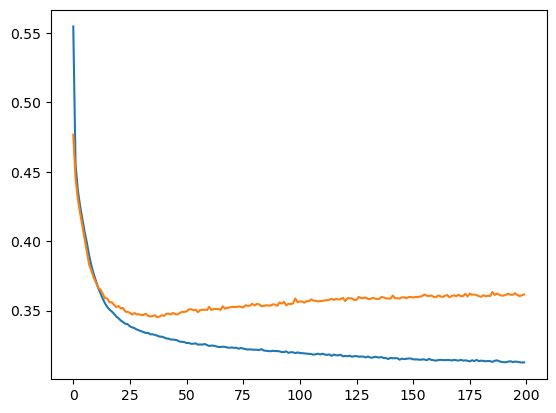

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

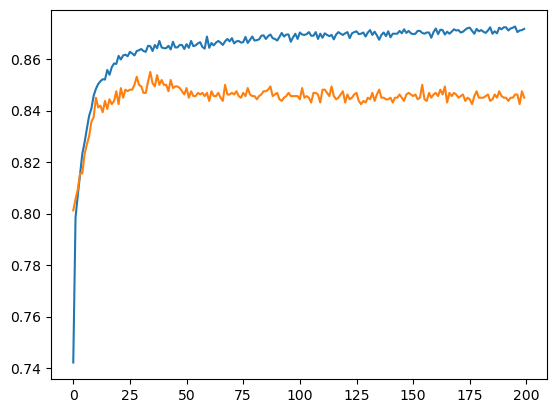

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])